In [4]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import jpholiday
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

# 作業ディレクトリの設定
try:
    os.chdir('H:/マイドライブ/03_code_test/clustering-house_trial')
    data_path_header = 'G:/マイドライブ/01_研究/02_円山町/1_データ前処理'
except FileNotFoundError:
    os.chdir('G:/マイドライブ/03_code_test/clustering-house_trial')
    data_path_header = 'H:/マイドライブ/01_研究/02_円山町/1_データ前処理'
print("Current Working Directory: ", os.getcwd())

Current Working Directory:  H:\マイドライブ\03_code_test\clustering-house_trial


In [5]:
# CSVファイルの読み込み
df_data = pd.DataFrame()
file_path_list = glob.glob(f'./data/*.csv')
for file_path in file_path_list:
    df = pd.read_csv(file_path)
    df_data = pd.concat([df_data, df], axis=0).reset_index(drop=True)

# 欠損処理
df_dropped = df_data.drop(['Rk', 'Name', 'Tm', 'Lev', 'Aff', 'GS', 'GF', 'SO/W', 'Name-additional'], axis=1)
df_features = df_dropped.dropna()
# 正規化
mm = preprocessing.MinMaxScaler()
df_features_mm = pd.DataFrame(mm.fit_transform(df_features), columns=df_features.columns)
df_features_mm

,Age,W,L,W-L%,ERA,RA9,G,CG,SHO,SV,...,SO,HBP,BK,WP,BF,WHIP,H9,HR9,BB9,SO9
0,0.48,0.928571,0.636364,0.630000,0.313830,0.300326,0.362319,0.6,0.50,0.000000,...,0.725275,0.8,0.0,0.111111,0.981716,0.274286,0.224138,0.352941,0.233766,0.396396
1,0.28,0.928571,0.454545,0.707778,0.352394,0.332971,0.362319,1.0,1.00,0.000000,...,0.857143,0.3,0.0,0.111111,0.970464,0.326857,0.284483,0.411765,0.259740,0.522523
2,0.32,0.785714,0.909091,0.494444,0.476064,0.408052,0.347826,1.0,0.25,0.000000,...,0.697802,0.7,0.0,0.555556,0.915612,0.389714,0.370690,0.470588,0.259740,0.441441
3,0.32,0.714286,0.454545,0.653333,0.389628,0.349293,0.304348,0.0,0.00,0.000000,...,0.379121,0.7,0.0,0.333333,0.715893,0.471429,0.474138,0.352941,0.272727,0.261261
4,0.24,0.714286,0.545455,0.607778,0.337766,0.310120,0.347826,0.4,0.25,0.000000,...,0.851648,0.3,0.0,0.444444,0.942335,0.354857,0.327586,0.294118,0.233766,0.549550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.20,0.000000,0.000000,1.000000,0.377660,0.412405,0.492754,0.0,0.00,0.023256,...,0.104396,0.2,0.0,0.000000,0.201125,0.421143,0.353448,0.117647,0.337662,0.297297
196,0.24,0.000000,0.181818,0.258889,0.117021,0.095756,0.608696,0.0,0.00,0.674419,...,0.269231,0.0,0.0,0.111111,0.198312,0.216000,0.146552,0.000000,0.233766,0.855856
197,0.16,0.000000,0.272727,0.166667,0.367021,0.367791,0.115942,0.2,0.00,0.000000,...,0.098901,0.0,0.0,0.222222,0.142053,0.396000,0.284483,0.352941,0.402597,0.423423
198,0.28,0.000000,0.090909,0.444444,0.239362,0.282916,0.449275,0.0,0.00,0.023256,...,0.214286,0.1,0.5,0.222222,0.229255,0.374857,0.310345,0.117647,0.311688,0.576577


Cluster 0: n = 11
Cluster 1: n = 26
Cluster 2: n = 30
Cluster 3: n = 26
Cluster 4: n = 25
Cluster 5: n = 43
Cluster 6: n = 23
Cluster 7: n = 16


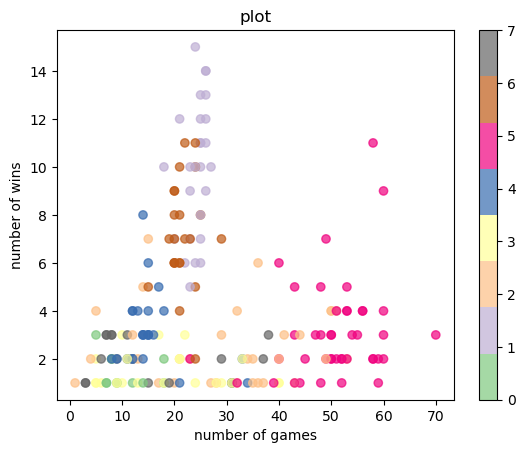

In [6]:
from sklearn.cluster import KMeans

k = 8 # クラスター数を指示

kmeanModel = KMeans(n_clusters=k, random_state=42)
kmeanModel.fit(df_features_mm)
clusters = kmeanModel.labels_

# クラスターごとに何サンプルあるか
for i in range(k):
    num = list(clusters).count(i)
    print(f'Cluster {i}: n = {num}')

plt.scatter(df_features['G'], df_features['W'],
            c=clusters, cmap='Accent', alpha=0.7)
plt.title('plot')
plt.xlabel('number of games')
plt.ylabel('number of wins')
plt.colorbar()
plt.show()


In [7]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(df_features_mm)
score = pd.DataFrame(pca.transform(df_features_mm), index=df_features.index)
score

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.701187,0.287919,0.445715,-0.075856,0.148785,-0.006391,0.140874,0.046366,-0.346132,-0.206343,...,0.035279,0.036814,0.001696,0.004789,0.045557,0.020017,-0.038143,-0.035274,-0.006367,0.001138
1,1.768278,0.323374,0.668911,0.019509,0.450644,-0.101019,-0.440471,0.191616,-0.258211,-0.616470,...,0.063024,0.151778,0.067070,0.100266,0.038219,0.084873,0.001581,-0.025318,-0.001365,-0.002834
2,1.963118,-0.057310,0.260814,0.086294,0.093612,0.134966,-0.187935,0.094069,-0.194565,-0.137789,...,0.089259,-0.259876,0.040966,0.090422,-0.044782,0.022112,-0.009478,0.021219,-0.003060,-0.001893
3,0.963311,0.007105,0.278259,0.187020,-0.137034,0.026226,0.340239,-0.073030,-0.038164,0.181120,...,0.121241,0.031772,-0.075846,0.076520,-0.032603,-0.049725,0.039795,0.005666,-0.005505,-0.001780
4,1.473654,0.305976,0.213460,0.105230,0.072817,0.002963,-0.239833,0.092713,0.026043,0.008564,...,0.022324,-0.036142,-0.039304,-0.021714,0.016502,0.063666,0.034934,0.000374,-0.001308,0.004218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.596034,0.219228,0.259338,0.219683,-0.046085,-0.169349,0.216810,-0.050076,0.055583,-0.083636,...,-0.075101,-0.003688,0.017720,-0.038939,0.065292,-0.001346,0.005228,0.001432,0.002038,0.001155
196,-0.601503,0.521410,-0.553819,-0.442972,0.041198,-0.091671,-0.193332,0.189634,-0.153531,-0.144337,...,0.105916,-0.014213,-0.030717,0.036048,-0.023460,-0.023443,-0.013305,-0.006584,0.002913,0.001141
197,-0.484180,-0.276243,-0.093558,-0.239000,-0.160066,0.009380,-0.393877,-0.126510,0.080257,-0.099532,...,0.040328,-0.109966,-0.009201,0.033159,0.007762,-0.017110,0.000671,0.002076,-0.000053,-0.002476
198,-0.463724,0.250163,-0.249570,-0.042081,-0.103484,-0.114675,-0.052374,0.266313,0.372462,-0.070925,...,0.086847,-0.047637,-0.005500,0.026445,0.039333,-0.007690,0.007335,-0.007030,-0.003635,0.000417


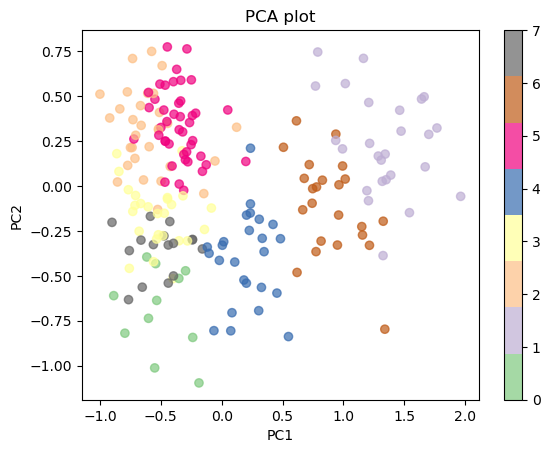

In [8]:
plt.scatter(score.iloc[:,0], score.iloc[:,1],
            c=clusters, cmap='Accent', alpha=0.7)
plt.title('PCA plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

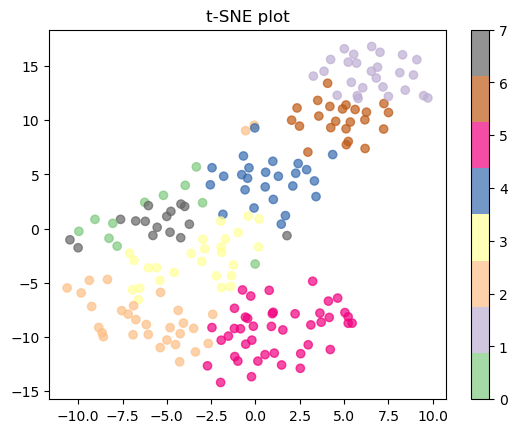

In [9]:
from sklearn.manifold import TSNE
embedding = TSNE(random_state=42).fit_transform(df_features_mm)
plt.scatter(embedding[:, 0], embedding[:, 1],
    c=clusters, cmap='Accent', alpha=0.7)
plt.title('t-SNE plot')
plt.colorbar()
plt.show()

In [10]:
import sklearn, umap
print("scikit-learn:", sklearn.__version__)
print("umap-learn:", umap.__version__)


scikit-learn: 1.5.1
umap-learn: 0.5.9.post2


In [11]:
import sklearn, sklearn.utils.validation as v, sys
print("sklearn version:", sklearn.__version__)
print("check_array obj:", v.check_array)
print("sklearn module path:", sklearn.__file__)
print(sys.executable)


sklearn version: 1.5.1
check_array obj: <function check_array at 0x00000225EC182950>
sklearn module path: c:\Users\Yuasa\anaconda3\envs\umapfix\lib\site-packages\sklearn\__init__.py
c:\Users\Yuasa\anaconda3\envs\umapfix\python.exe


In [13]:
import umap
mapper = umap.UMAP(random_state=42)
embedding = mapper.fit_transform(df_features_mm)
plt.scatter(embedding[:, 0], embedding[:, 1],
    c=clusters, cmap='Accent', alpha=0.7)
plt.title('UMAP plot')
plt.colorbar()
plt.show()

TypeError: check_array() got an unexpected keyword argument 'ensure_all_finite'

In [ ]:
import umap
mapper = umap.UMAP(random_state=42)
embedding = mapper.fit_transform(df_features_mm)
plt.scatter(embedding[:, 0], embedding[:, 1],
    c=clusters, cmap='Accent', alpha=0.7)
plt.title('UMAP plot')
plt.colorbar()
plt.show()

TypeError: check_array() got an unexpected keyword argument 'ensure_all_finite'